In [157]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
from sklearn.metrics import roc_curve, auc
import pyreadstat

# read the data in
df, meta = pyreadstat.read_sav("./telco_0507.sav")
df = df[["equipmon", "employ", "churn", "tenure_chaid"]]

df

,equipmon,employ,churn,tenure_chaid
0,0.00,5.0,1.0,2.0
1,0.00,5.0,1.0,2.0
2,0.00,29.0,0.0,6.0
3,0.00,0.0,1.0,4.0
4,0.00,2.0,0.0,3.0
...,...,...,...,...
995,29.05,0.0,0.0,2.0
996,25.60,5.0,0.0,2.0
997,54.55,33.0,0.0,6.0
998,0.00,22.0,0.0,6.0


In [158]:
# dummify
dummy_ranks = pd.get_dummies(df['tenure_chaid'], prefix='tenure_chaid')
# create a clean data frame for the regression
cols_to_keep = ["churn", "equipmon", "employ"]

In [159]:
data = df[cols_to_keep].join(dummy_ranks.iloc[1:])

In [160]:
# manually add the intercept
data['intercept'] = 1

train_cols = data.columns[1:]
# fit the model
result = sm.Logit(data['churn'], data[train_cols].fillna(0)).fit()

# Add prediction to dataframe
data['pred'] = result.predict(data[train_cols])

         Current function value: 0.469385
         Iterations: 35


C:\Users\THINKPAD\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Area under the ROC curve : 0.792969
          fpr       tpr     1-fpr        tf  thresholds
155  0.285124  0.722628  0.714876  0.007752    0.283275


[]

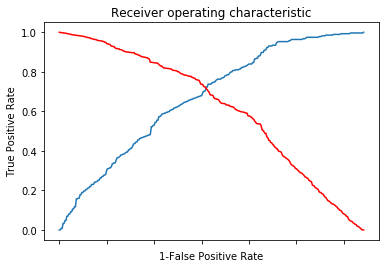

In [161]:
fpr, tpr, thresholds =roc_curve(data['churn'], data['pred'].fillna(0))
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
print(roc.iloc[(roc.tf-0).abs().argsort()[:1]])

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])